# Analisi Esplorativa (EDA) sulle Aziende Unicorno


## Introduzione

Il mio compito in questa analisi è continuare l'esplorazionde del dataset di **aziende unicorno** per fornire spunti preziosi a una società di investimento.

Attraverso l'**analisi esplorativa dei dati (EDA)**, mi concentrerò sulle seguenti attività:

- **Caratteristiche del dataset**: Scoprirò la struttura e la natura dei dati a disposizione.

- **Preparazione dei dati**: Strutturerò i dati in modo da renderli adatti a trarre conclusioni significative.

**Visualizzazione**: attraverso i grafici per individuare tendenze e pattern.

L'**obiettivo finale** è identificare le tendenze e i modelli più rilevanti per aiutare la società di investimento a prendere decisioni più informate sulle future acquisizioni.


## Step 1: Importazione

### Importazione librerie e moduli

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Caricamento del dataset in un DataFrame

In [9]:
companies = pd.read_csv("Unicorn_Companies.csv")

## Step 2: Esplorazione dei dati


### Controllo duplicati

In [10]:
print("PRIMA")
print(companies.shape)
print("DOPO")
print(companies.drop_duplicates().shape)


PRIMA
(1074, 10)
DOPO
(1074, 10)


- Poiché la forma restituita dopo aver eliminato i duplicati è la stessa del DataFrame originale, è possibile dedurre che non ci sono valori duplicati nel set di dati.

### Visualizzare i tipi di dati delle colonne

Conoscere i tipi di dati delle colonne è utile perché indica quali tipi di analisi e aggregazione possono essere eseguiti, come una colonna può essere trasformata per adattarsi ad attività specifiche e così via.

In [11]:
# uso il la funzione .dtypes per conoscere i tipi di dati
companies.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

- Il tipo di dati della colonna `Year Founded` è `int64`.
- Le altre colonne hanno il tipo di dati `object`.

### Ordinare i dati

Ordino i dati in modo da ottenere informazioni sulla data di fondazione delle aziende.

In [12]:
# Ordino `companies` e visualizzo le prime 10 righe
# dal più recente al meno recente per anno di fondazione

companies.sort_values(by="Year Founded", ascending=False).head(10)


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
782,Phantom,$1B,1/31/22,Fintech,San Francisco,United States,North America,2021,$118M,"Paradigm, Andreessen Horowitz, Jump Capital"
714,Yidian Zixun,$1B,10/17/17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund"
822,GlobalBees,$1B,12/28/21,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca..."
554,ClickHouse,$2B,10/28/21,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par..."
952,LayerZero Labs,$1B,3/30/22,Internet software & services,New York,United States,North America,2021,$143M,"Andreessen Horowitz, FTX Ventures, Tiger Globa..."
314,Flink Food,$3B,12/1/21,E-commerce & direct-to-consumer,Berlin,Germany,Europe,2021,$1B,"Mubadala Capital, Bond, Prosus Ventures"
864,Aptos,$1B,3/15/22,Internet software & services,Palo Alto,United States,North America,2021,$200M,"Andreessen Horowitz, Coinbase Ventures, Tiger ..."
238,Yuga Labs,$4B,3/22/22,Fintech,Miami,United States,North America,2021,$450M,"Andreessen Horowitz, Thrive Capital, Sound Ven..."
775,Jokr,$1B,12/2/21,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft"
967,Mensa Brands,$1B,11/16/21,Other,Bengaluru,India,Asia,2021,$218M,"Accel, Falcon Edge Capital, Norwest Venture Pa..."


### Determinare il numero di aziende fondate ogni anno

Desidero scoprire quante aziende in questo dataset sono state fondate ogni anno. 

In [13]:
# Visualizzo il numero di aziende fondate in ogni anno

companies["Year Founded"].value_counts().sort_values(ascending=False)


2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     11
2001      9
1999      8
2004      8
2003      8
1998      5
2002      4
1994      2
1995      2
1992      1
1993      1
1990      1
1984      1
1996      1
1979      1
1991      1
1919      1
1997      1
Name: Year Founded, dtype: int64

- Il 2015 ha il conteggio più alto. Ciò indica che il 2015 è l'anno in cui è stato fondato il maggior numero di aziende in questo set di dati.

Traccia un istogramma per `Year Founded`.

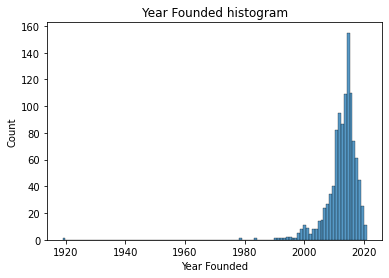

In [14]:
sns.histplot(data=companies, x='Year Founded')
plt.title('Year Founded histogram');

#### Insight principali
- La maggior parte delle aziende unicorno è stata fondata tra il 2010 e il 2018, con un picco significativo proprio in questo periodo.

- Il numero di nuove aziende unicorno è cresciuto in modo esponenziale a partire dagli anni 2000, suggerendo un'accelerazione nella creazione di queste società.

- La fondazione di aziende unicorno prima del 2000 è molto rara, con solo un paio di casi isolati, a dimostrazione che il fenomeno è legato a un contesto economico e tecnologico moderno.

### Conversione della colonna `Date Joined` in datetime

Converto la colonna `Date Joined` in datetime. Questo suddividerà ogni valore nelle componenti anno, mese e data, consentendomi in seguito di ottenere informazioni su quando un'azienda ha ottenuto lo status di unicorno rispetto a ciascuna componente.

In [15]:
# Converto Date Joined in datime
# Aggiorno la colonna con i valori convertiti

companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])

# Visualizzare i tipi di dati delle colonne in `companies`
# per confermare che l'aggiornamento sia effettivamente avvenuto

companies.dtypes

Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

### Creare una colonna `Month Joined`

Creerò una nuova colonna, `Month Joined`, che conterrà i nomi dei mesi in cui le aziende sono diventate unicorno.

In [16]:
companies["Month Joined"] = companies["Date Joined"].dt.month_name()

companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December


### Creazione di una colonna "Anni di adesione"

Ora calcolerò il tempo impiegato dalle aziende per raggiungere lo status di unicorno. Userò questo risultato per creare una nuova colonna, "Year To Join". L'aggiunta di questa colonna al dataset mi sarà utile per rispondere a domande specifiche su questo aspetto del ciclo di vita delle aziende.

In [17]:
companies["Years To Join"] = companies["Date Joined"].dt.year - companies["Year Founded"]

companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6


### Maggiori informazioni su un anno specifico

Per concentrarmi sull'anno 2021, **filtro** il dataset principale e salvo il sottoinsieme di dati in una nuova variabile per un'analisi più dettagliata.

In [18]:
companies_2021 = companies[companies["Date Joined"].dt.year == 2021]

companies_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",July,3
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",April,6
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",February,10
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",July,4
34,Getir,$12B,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",March,6


### Tendenze nel tempo

Dopo aver individuato l'intervallo di tempo che mi interessa, procederò così:

1.  **Isolo il sottoinsieme** dell'anno che ho definito, aggiungendo una colonna che specifica a quale intervallo di tempo appartiene ogni dato.
2.  **Raggruppo** le aziende in base a questo intervallo, **contando** quante ne hanno acquisito lo status di unicorno in ogni periodo.
3.  **Salvo** il risultato in un nuovo DataFrame.

In [19]:
# aggiunge una nuova colonna chiamata Week Joined al DataFrame companies_2021 
# nella posizione 3. I valori di questa nuova colonna sono le settimane dell'anno, 
# estratte dalla colonna Date Joined e formattate come anno e 
# numero della settimana (es. 2021-W05)

companies_2021.insert(3, "Week Joined", companies_2021["Date Joined"].dt.strftime('%Y-W%V'), True)

# Raggruppa le aziende del 2021 per settimana, 
# conta quante sono diventate unicorno ogni settimana 
# e salva il risultato in un nuovo DataFrame.
companies_by_week_2021 = companies_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})

# check
companies_by_week_2021.head()


,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


### Confrontare i trend nel tempo

Procedo così:

1.  **Filtro** i dati per l'anno aggiuntivo (2020), creando un nuovo sottoinsieme.
2.  **Concateno** questo nuovo sottoinsieme con quello che avevo già definito.
3.  **Aggiungo** una colonna che indica l'intervallo di tempo (es. settimana o mese) per ogni dato nel DataFrame unito.
4.  **Trasformo** la colonna `Valuation` 
5.  **Raggruppo** il DataFrame per intervallo di tempo e **calcolo la valutazione media** delle aziende che si sono unite in ogni intervallo.
6.  Infine, **salvo** il risultato in una nuova variabile.


In [20]:
# # Filtra in base all'anno aggiuntivo per creare un 
# sottoinsieme composto dalle aziende che hanno aderito in quell'anno.
companies_2020 = companies[companies["Date Joined"].dt.year == 2020]

# Concatena il nuovo sottoinsieme con il sottoinsieme definito in precedenza.
companies_2020_2021 = pd.concat([companies_2020, companies_2021.drop(columns="Week Joined")])

# Aggiunge la colonna `Quarter Joined` a `companies_2021`.
companies_2020_2021["Quarter Joined"] = companies_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')

# Converte la colonna `Valuation` in numerico rimuovendo `$` e `B` e
# convertendo ogni valore nel tipo di dati `float`.
companies_2020_2021["Valuation"] =  companies_2020_2021["Valuation"].str.strip("$B").astype(float)

# Raggruppa `companies_2020_2021` per `Quarter Joined`,
# Aggrega calcolando la media dei `Finanziamenti` delle aziende 
# che hanno aderito per trimestre di ogni anno.
# Salva il DataFrame risultante in una nuova variabile.
companies_by_quarter_2020_2021 = companies_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})

# Check
companies_by_quarter_2020_2021.head()


,Quarter Joined,Average Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.777778
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.750000


## Fase 3: Visualizzazione del tempo impiegato dalle aziende per diventare unicorni

### Visualizza il tempo impiegato dalle aziende per diventare unicorni

Userò un **box plot** per visualizzare e confrontare la distribuzione del tempo impiegato dalle aziende per diventare unicorno, suddiviso per ogni mese dell'anno in cui hanno ottenuto questo status.

In [21]:
# Definire una lista che contiene i mesi in ordine cronologico.
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", 
               "December"]

#Check
print(month_order)
            

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


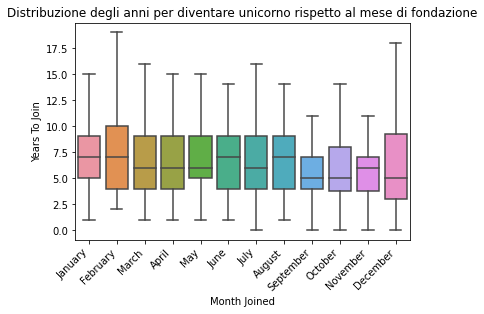

In [22]:
# Creazione del box plot per visualizzare la distribuzione del tempo impiegato 
# dalle aziende per diventare unicorni, in base al mese di adesione.
sns.boxplot(x=companies['Month Joined'], 
            y=companies['Years To Join'], 
            order=month_order, 
            showfliers=False)

# Titolo grafico
plt.title('Distribuzione degli anni per diventare unicorno rispetto al mese di fondazione')

# Rotazione etichette
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()


Nel box plot, si nota che il **valore mediano del tempo** impiegato per diventare unicorno varia in base al mese in cui è stato raggiunto tale status.

In particolare, i mesi di **settembre** e **ottobre** mostrano una mediana inferiore. Questo suggerisce che le aziende che hanno acquisito lo status di unicorno all'inizio dell'autunno hanno impiegato in media meno tempo per raggiungere la valutazione di 1 miliardo di dollari.

## Fase 4: Risultati e valutazione

### Visualizzare il tempo impiegato dalle aziende per raggiungere lo status di unicorno

In questa sezione valuterò i risultati della strutturazione, delle osservazioni e degli approfondimenti ottenuti dai dati.

Utilizzando il dataset delle aziende, creerò un **grafico a barre** per visualizzare la media degli anni impiegati dalle aziende per raggiungere lo status di unicorno, partendo dalla loro fondazione.

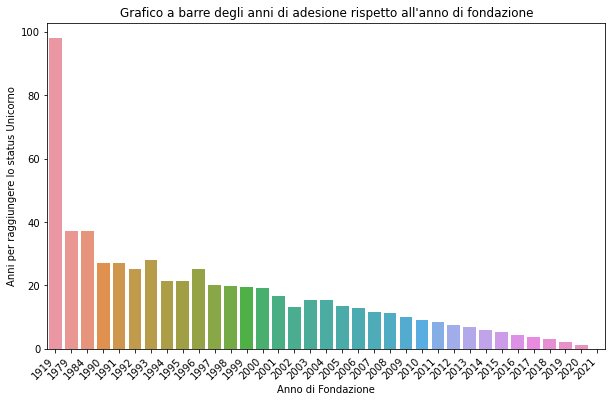

In [26]:
# Dimensione grafico

plt.figure(figsize=(10,6))


# Crea un grafico a barre per visualizzare il numero medio di anni 
# impiegati dalle aziende per raggiungere lo status di unicorno
# rispetto alla loro fondazione.
# Rappresenta graficamente i dati dal DataFrame `companies`.
sns.barplot(x=companies["Year Founded"], y=companies["Years To Join"], ci=False)


# Titolo
plt.title("Grafico a barre degli anni di adesione rispetto all'anno di fondazione")


# Etichette asse x
plt.xlabel("Anno di Fondazione")


# Set y-axis label

### YOUR CODE HERE ###

plt.ylabel("Anni per raggiungere lo status Unicorno")


# Rotazione etichette
plt.xticks(rotation=45, horizontalalignment='right')

plt.show()

L'analisi mostra che le aziende nate di recente sono diventate unicorno più velocemente. 

Tuttavia, bisogna prestare attenzione a un problema chiamato **bias temporale**. Le aziende più vecchie che hanno impiegato molto tempo per diventare unicorno sono tutte presenti nel nostro set di dati. Al contrario, per le aziende più recenti, il nostro dataset include **solo** quelle che hanno avuto una crescita rapidissima, poiché quelle a crescita lenta non hanno ancora avuto il tempo di raggiungere lo status di unicorno.

In pratica, confrontando un gruppo selezionato di "campioni veloci" recenti con l'intera popolazione di aziende storiche, può dare l'illusione che la crescita sia in generale più veloce oggi.


### Numero di aziende per settimana del 2021

Voglio visualizzare quante aziende sono diventate unicorno in ogni intervallo a ogni settimana nel corso del 2021. Per farlo, utilizzerò un **grafico a barre**.

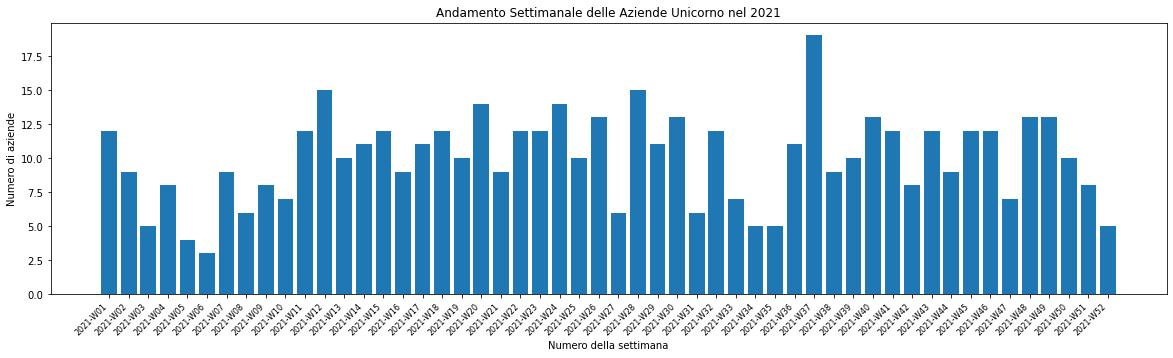

In [28]:
#Dimensione del grafico
plt.figure(figsize = (20, 5))

# Crea un grafico a barre per visualizzare 
# il numero di aziende che hanno aderito per intervallo nell'anno 2021
plt.bar(x=companies_by_week_2021['Week Joined'],height=companies_by_week_2021['Company Count'])
plt.plot()

# Etichette asse x
plt.xlabel("Numero della settimana")

# Etichette asse y
plt.ylabel("Numero di aziende")

# Titolo
plt.title("Andamento Settimanale delle Aziende Unicorno nel 2021")

# Rotazione etichette asse x
plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)



plt.show()

- **Osservazioni**:

- Il numero di aziende che hanno raggiunto lo status di unicorno ha oscillato nel corso delle settimane del 2021, con un trend di calo seguito da un aumento periodico.
- Il numero più elevato di aziende ha raggiunto una valutazione di 1 miliardo di dollari nella settimana 37 del 2021, che corrisponde alla terza settimana di settembre 2021.
- Le settimane del 2021 con il numero successivo più elevato di aziende che sono diventate unicorno sono la settimana 12 (che corrisponde alla quarta settimana di marzo) e la settimana 28 (che corrisponde alla terza settimana di luglio).
  

### Valutazione media per trimestre

In questa sezione, visualizzerò l'andamento della **valutazione media trimestrale** delle aziende che hanno raggiunto lo status di unicorno. Creerò un **grafico a barre raggruppato** che confronterà la valutazione media per ogni trimestre degli anni che mi interessano. Ogni trimestre avrà due barre, una per ciascun anno, in modo da poter visualizzare facilmente le differenze.

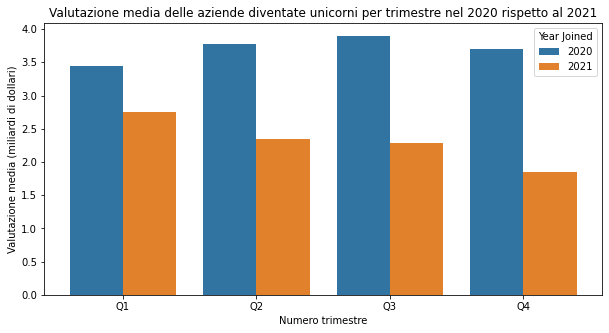

In [29]:
# Utilizzando lo slicing, estraggo la componente anno e l'intervallo di tempo specificato,
# e li salvo aggiungendo due nuove colonne
### YOUR CODE HERE ###

companies_by_quarter_2020_2021['Quarter Number'] = companies_by_quarter_2020_2021['Quarter Joined'].str[-2:]
companies_by_quarter_2020_2021['Year Joined'] = companies_by_quarter_2020_2021['Quarter Joined'].str[:4]

# DImensione del grafico
plt.figure(figsize = (10, 5))

# Creazione di un grafico a barre raggruppate
sns.barplot(x=companies_by_quarter_2020_2021['Quarter Number'],
            y=companies_by_quarter_2020_2021['Average Valuation'],
            hue=companies_by_quarter_2020_2021['Year Joined'])
plt.plot()

# etichette asse x
plt.xlabel("Numero trimestre")

# etichette asse y
plt.ylabel("Valutazione media (miliardi di dollari)")

# Titolo grafico
plt.title("Valutazione media delle aziende diventate unicorni per trimestre nel 2020 rispetto al 2021")


plt.show()

### Osservazioni
- In ciascun trimestre, la valutazione media delle aziende che hanno raggiunto lo status di unicorno è stata più alta nel 2020 rispetto al 2021.
- Nel 2020, il terzo trimestre è stato il trimestre con la valutazione media più alta delle aziende che hanno raggiunto lo status di unicorno, con un trend in aumento dal primo al secondo trimestre e dal secondo al terzo trimestre.
- Nel 2021, il primo trimestre è stato il trimestre con la valutazione media più alta delle aziende che hanno raggiunto lo status di unicorno, con un trend in calo nei trimestri.

Ci sono comunque diversi tipi di bias che potrebbero influenzare l'analisi dei dati, rendendo i risultati meno rappresentativi della realtà.

- L'analisi potrebbe essere influenzata da un campionamento geografico non uniforme. Se i dati coprono principalmente determinate città o nazioni, le conclusioni potrebbero riflettere le tendenze di quelle aree, ignorando quelle di altre regioni non incluse.

- Se il dataset non include tutti i settori, l'analisi risulterà rappresentativa solo delle industrie presenti. I trend osservati potrebbero non essere validi per i settori che sono stati esclusi.

- Eventuali interruzioni o lacune nella raccolta dei dati possono distorcere i risultati, influenzando i pattern che si osservano nel tempo. Un altro bias temporale cruciale è che i dati sono più abbondanti per le aziende fondate anni fa rispetto a quelle più recenti, poiché le prime hanno avuto più tempo per maturare e generare dati.

### Raccomandazioni

- Secondo un'analisi dei dati condotta su un dataset di 1074 aziende unicorno, le aziende che hanno aderito nei mesi di settembre e ottobre tendevano a impiegare meno tempo per diventare unicorni.
- Un'altra scoperta è stata che molte delle aziende unicorno fondate nel 2021 sono state fondate negli Stati Uniti e appartengono ai settori "Fintech", "E-commerce e direct-to-consumer" e "Software e servizi Internet". Pertanto, se gli stakeholder desiderano investire in aziende fondate nel 2021, sarebbe opportuno considerare aziende appartenenti a questi settori, in quanto potrebbero essere ottime candidate a diventare unicorni.
- È stato inoltre scoperto che la valutazione media delle aziende che hanno aderito nel 2021 è più alta nel primo trimestre dell'anno, mentre la valutazione media delle aziende che hanno aderito nel 2020 è nel terzo trimestre dell'anno. Quando si considerano le aziende che aderiranno di nuovo in futuro, varrebbe la pena analizzare attentamente quelle che aderiscono nel primo e nel terzo trimestre dell'anno.
- I dati possono essere ulteriormente analizzati per raccogliere informazioni più specifiche sugli interessi della società di investimento e delle parti interessate.

### Possibili passi successivi per future analisi EDA:

- Analizzare i dati relativi ai settori delle aziende unicorno a diversi intervalli di tempo.
- Analizzare i dati relativi alle città o ai paesi in cui sono state fondate le aziende unicorno a diversi intervalli di tempo.